In [13]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [36]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
# print(iris.metadata) 
  
# # variable information 
# df=pd.DataFrame(iris.variables)
df = pd.concat([iris.data.features, iris.data.targets], axis=1)
df.head(10)



,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [37]:
df.shape

(150, 5)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Filtering Data

In [40]:
# Filter the dataset where petal length is greater than 1.5
filtered_df = df[df['petal length'] > 1.5]

In [41]:
filtered_df.head()

,sepal length,sepal width,petal length,petal width,class
5,5.4,3.9,1.7,0.4,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa


## GroupBy Operations

In [51]:
# Group the dataset by species and calculate the average sepal width for each group
grouped_df = df.groupby('class')['sepal width'].mean()

In [52]:
grouped_df.head()

class
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: sepal width, dtype: float64

In [53]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualization

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Scatter plot

In [56]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


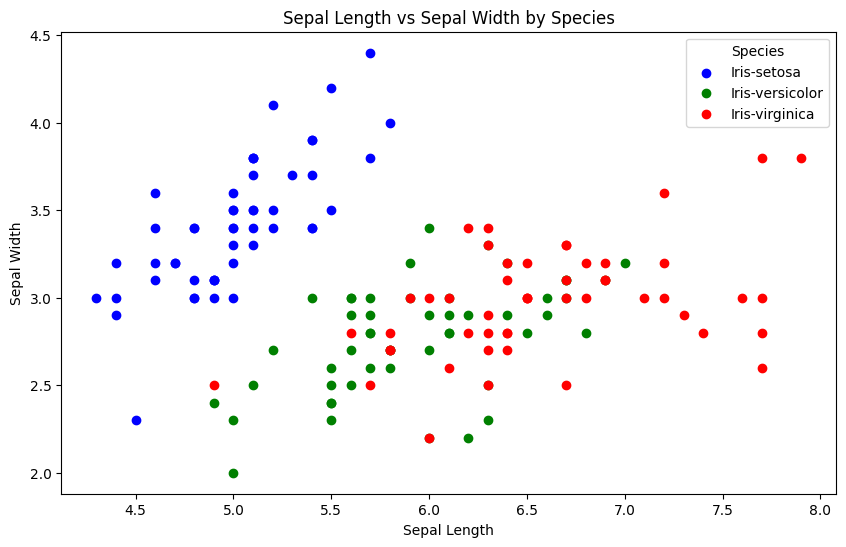

In [67]:
# Initialize the plot
plt.figure(figsize=(10, 6))

# Define colors for different species
colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Plot each species with different colors
for species, color in colors.items():
    subset = df[df['class'] == species]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=species, color=color)

# Adding labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend(title='Species')

# Display the plot
plt.show()

## 2. Box Plot

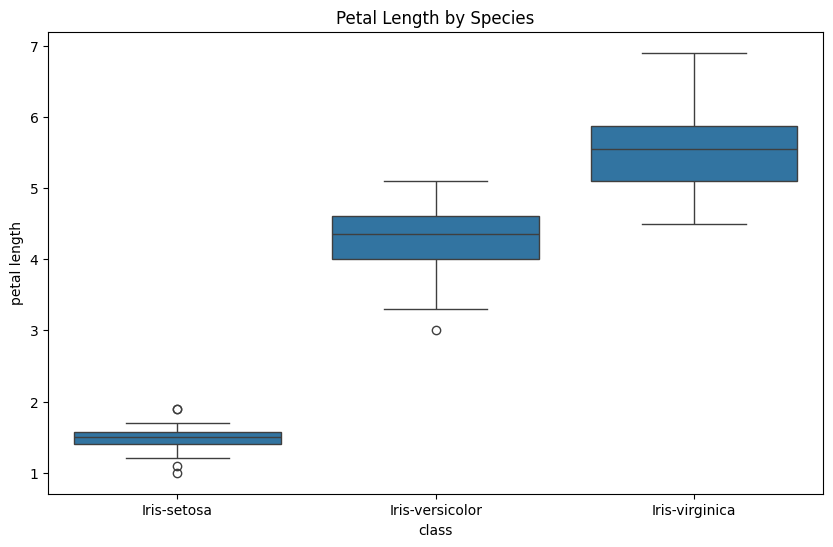

In [68]:
# using seaborn create a box plot to show the distribution of petal lengths for each species 
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='petal length', data=df)
plt.title('Petal Length by Species')
plt.show()


# Adding a New Column

In [74]:
# Add a new column to the dataset that represent the ratio of petal length to petal width 
df['petal ratio'] = df['petal length'] / df['petal width']
df.head()  # Print the first few rows of the updated dataset


,sepal length,sepal width,petal length,petal width,class,petal ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,7.0
1,4.9,3.0,1.4,0.2,Iris-setosa,7.0
2,4.7,3.2,1.3,0.2,Iris-setosa,6.5
3,4.6,3.1,1.5,0.2,Iris-setosa,7.5
4,5.0,3.6,1.4,0.2,Iris-setosa,7.0


# Data Aggregation

In [70]:
# Find the species with the new maximum average petal length and display its name and average petal length 

grouped_df = df.groupby('class')['petal length'].mean()
max_avg_petal_length = grouped_df.max()
species = grouped_df.idxmax()
print(f"The species with the new maximum average petal length is {species} with an average petal length of {max_avg_petal_length}")




The species with the new maximum average petal length is Iris-virginica with an average petal length of 5.5520000000000005


# Advanced Visualization : Pair Plot

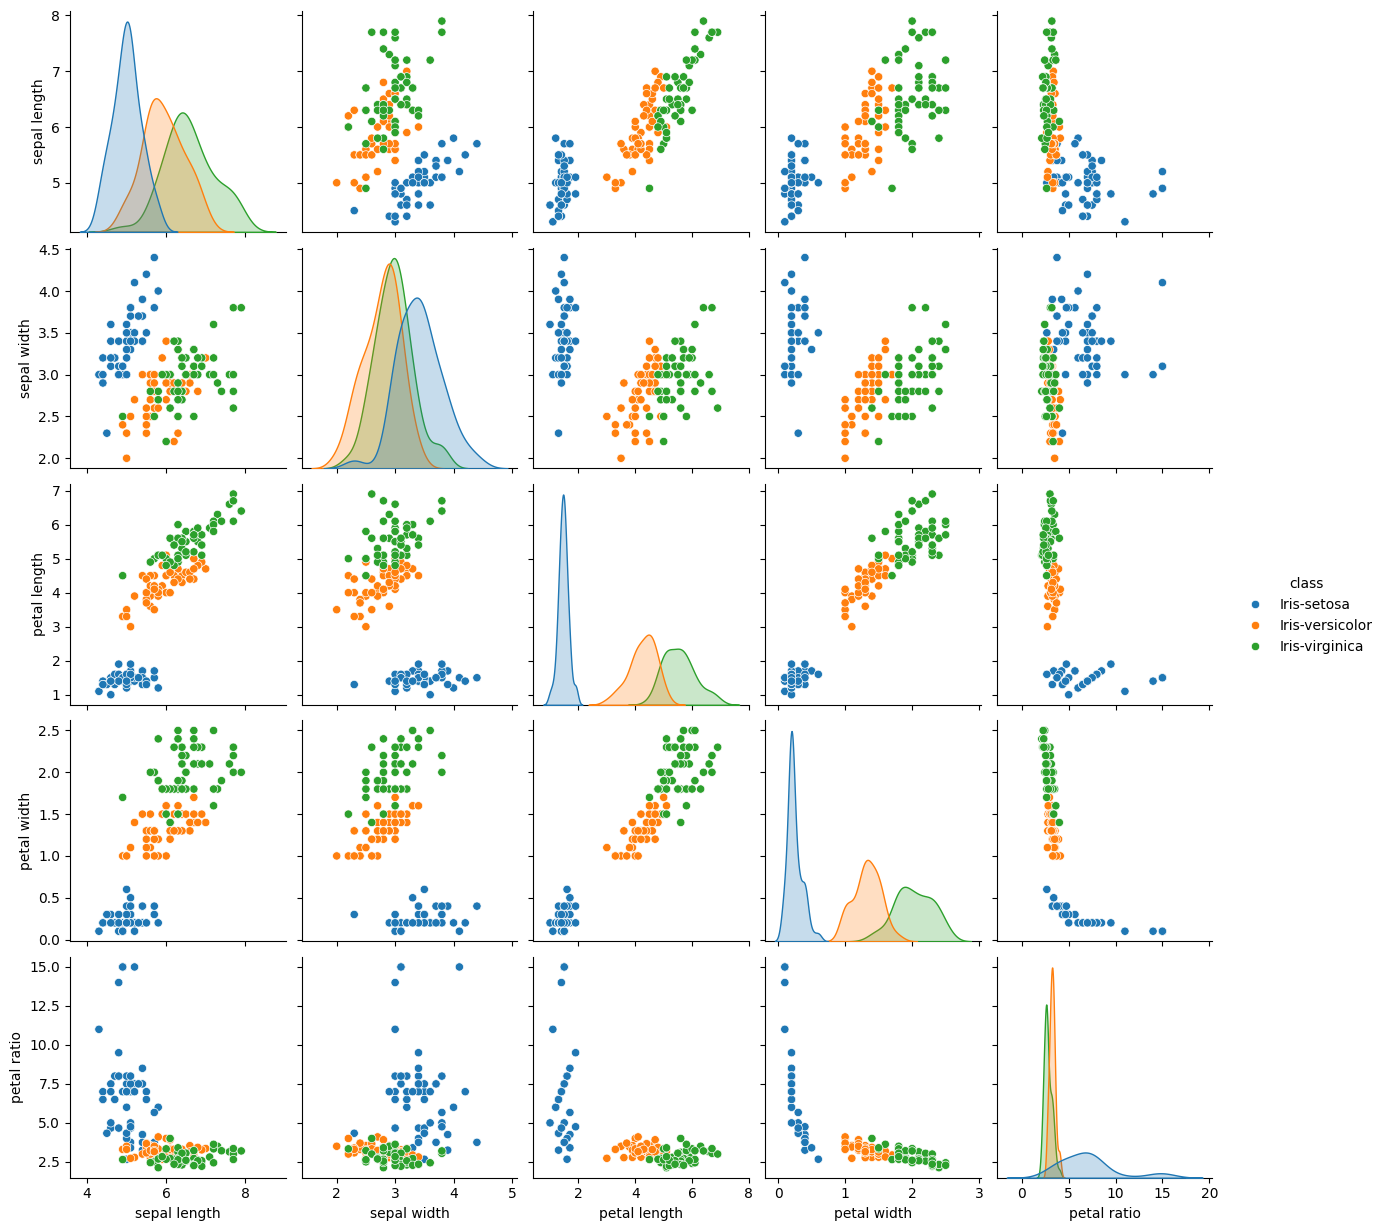

In [76]:
# create a pair plot using seaborn to Visualize pairwise relationship in dataset, color-coded by species
sns.pairplot(df, hue='class')
plt.show()